In [1]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets, layers
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img("0066.jpg")

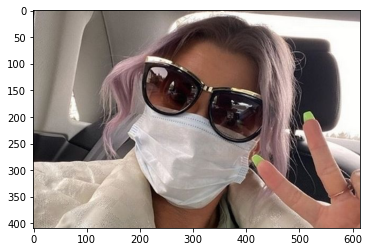

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("0066.jpg").shape

(409, 615, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
train_dataset = train.flow_from_directory('FaceMaskDataset/Train',
                                         target_size = (200,200),
                                         batch_size = 50,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('FaceMaskDataset/Validation',
                                         target_size = (200,200),
                                         batch_size = 50,
                                         class_mode = 'binary')

Found 10597 images belonging to 2 classes.
Found 1106 images belonging to 2 classes.


In [13]:
model = Sequential()

model.add( Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)) )
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32,(3,3),activation='relu') )
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(16,(3,3),activation='relu') )
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
TrainedModel = model.fit(train_dataset,
                         epochs = 10,
                         validation_data = validation_dataset
                         )

Epoch 1/10
212/212 [==============================] - 690s 3s/step - loss: 0.1975 - accuracy: 0.9212 - val_loss: 0.1220 - val_accuracy: 0.9521
Epoch 2/10
212/212 [==============================] - 668s 3s/step - loss: 0.0923 - accuracy: 0.9668 - val_loss: 0.0961 - val_accuracy: 0.9593
Epoch 3/10
212/212 [==============================] - 666s 3s/step - loss: 0.0639 - accuracy: 0.9752 - val_loss: 0.0986 - val_accuracy: 0.9638
Epoch 4/10
212/212 [==============================] - 653s 3s/step - loss: 0.0514 - accuracy: 0.9806 - val_loss: 0.0708 - val_accuracy: 0.9756
Epoch 5/10
212/212 [==============================] - 690s 3s/step - loss: 0.0455 - accuracy: 0.9821 - val_loss: 0.0811 - val_accuracy: 0.9711
Epoch 6/10
212/212 [==============================] - 651s 3s/step - loss: 0.0334 - accuracy: 0.9866 - val_loss: 0.0891 - val_accuracy: 0.9638
Epoch 7/10
212/212 [==============================] - 645s 3s/step - loss: 0.0315 - accuracy: 0.9888 - val_loss: 0.1119 - val_accuracy: 0.9647

In [16]:
test_dataset = train.flow_from_directory('FaceMaskDataset/Test',
                                         target_size = (200,200),
                                         batch_size = 50,
                                         class_mode = 'binary')

model.evaluate(test_dataset)[1]

Found 1092 images belonging to 2 classes.
22/22 [==============================] - 41s 2s/step - loss: 0.0694 - accuracy: 0.9808


0.9807692170143127

<function matplotlib.pyplot.show(close=None, block=None)>

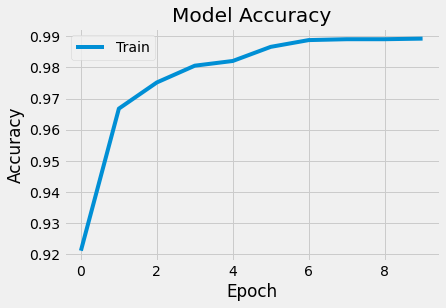

In [17]:
plt.style.use('fivethirtyeight')

plt.plot(TrainedModel.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

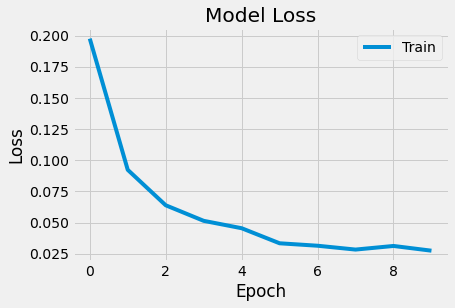

In [18]:
plt.plot(TrainedModel.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show